In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install xlrd
nature = pd.read_excel('data/LibraryNatural_Training5299.xls')
design = pd.read_excel('data/20220928_design_sheet.xlsx')
seq_59_design = [a[:16] + a[18:44] + a[45:] for a in design.seq][:11608]

In [3]:
def amino_acid_to_logits(sequences):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY-*'
    mapping = {aa: i for i, aa in enumerate(amino_acids)}
    return np.array([[mapping[aa] for aa in seq] for seq in sequences])

def hamming_distances(design_sequences, nature_sequences):
    distances = np.zeros((len(design_sequences), len(nature_sequences)))
    for i, design_sequence in enumerate(design_sequences):
        distances[i] = np.sum(design_sequence != nature_sequences, axis=1)
    return distances

design_sequences = amino_acid_to_logits(seq_59_design)
nature_sequences = amino_acid_to_logits(nature['Sequence_aligned'].values.tolist())

distances = hamming_distances(design_sequences, nature_sequences)
closest_sequences_indices = np.argmin(distances, axis=1)

closest_sequences = [nature['Sequence_aligned'][index] for index in closest_sequences_indices]

In [8]:
len(closest_sequences)

11608

In [9]:
nature.loc[closest_sequences_indices] # index for each closest design seq

,Sequence_aligned,Sequences_unaligned,RE_norm,Protein Name,DomainName,TranscriptID,Species,Phylogeny,orthologous_group,DomainNo,In Training Set
827,NFIYKAKALYPYDADDAYEISFEQNEILQVSDIEGRWWKARRNGET...,DNFIYKAKALYPYDADDDDAYEISFEQNEILQVSDIEGRWWKARRA...,1.000000,Tyrosine kinases,"YER118C_domain_number[1],jgi",2071.0,Saccharomyces cerevisiae S288C,cellular organisms; Eukaryota; Opisthokonta; F...,NOG09120,1,True
4425,PALFEVQSLYDYDALEPTDLSLSKGERLVIVDQMEHWWKARNNGQE...,APALFEVQSLYDYDALEPTDLSLSKGERLVIVDQMEEHWWKARNNA...,0.012654,Predicted protein {ECO:0000313|EMBL:EDQ89876.1},NaN,NaN,Monosiga brevicollis,cellular organisms; Eukaryota; Opisthokonta; C...,NaN,1,True
2047,TARKVAVALHDFNAASSDELSLKVGDRVTVLNEVTGWWMGE-NGRS...,ATARKVAVALHDFNAASSDELSLKVGDRVTVLNEVTDGWWMGECNG...,-0.086621,Lysophosphatidic acid acyltransferase endophil...,"estExt_Genewise1.C_190192_domain_number[1],""jgi",155364.0,Gelatoporia subvermispora B,cellular organisms; Eukaryota; Opisthokonta; F...,NaN,1,True
504,PKKPMAKVLYDFSSAQSNELSIKAGELVEIVSKEGGWWLCMNTSVQ...,APKKPMAKVLYDFSSAQSNELSIKAGELVEIVSKEGNGWWLCMNTT...,NaN,Myosin class I heavy chain,"ATET_07759_domain_number[1],jgi",1897.0,Aspergillus terreus NIH2624,cellular organisms; Eukaryota; Opisthokonta; F...,COG5022,1,True
2149,SKKPTAKVLYDFSSDRDNELNIRAGEIVQIVSKEGGWWLCMNTSTQ...,ASKKPTAKVLYDFSSDRDNELNIRAGEIVQIVSKEGNGWWLCMNMT...,-0.076212,Myosin class I heavy chain,"EPS31463_domain_number[1],jgi",6586.0,Penicillium oxalicum 114-2,cellular organisms; Eukaryota; Opisthokonta; F...,COG5022,1,True
...,...,...,...,...,...,...,...,...,...,...,...
158,DYGYKARALYAYQANAPTEISFSKGEVLDIVDNSGKWWQARRNGET...,PDYGYKARALYAYQANADDPTEISFSKGEVLDIVDNSGKWWQARRS...,0.912006,Epidermal growth factor receptor kinase substrate,"mRNA_UMAG_03156_domain_number[1],jgi",10649.0,Ustilago maydis 521,cellular organisms; Eukaryota; Opisthokonta; F...,NOG09120,1,True
729,EPVKQAQALYAYKPDDPNELSFKKGDIFDIIDSSGKWWEVEADGST...,EEPVKQAQALYAYKASPDDPNELSFKKGDIFDIIDSSGKWWEVEAA...,0.791435,"Adaptor protein NCK/Dock, contains SH2 and SH3...",fgenesh3_kg.LG_4_#_1174_#_Locus_2884_Transcrip...,688849.0,Laccaria bicolor S238N-H82,cellular organisms; Eukaryota; Opisthokonta; F...,NOG09120,1,True
2229,FTAKKAKAVYTYTAGNADELPFNEGDELSIIDMSEEWWKTEKDGVV...,VFTAKKAKAVYTYTAGNADELPFNEGDELSIIDMSEDEWWKTEKDG...,NaN,Synaptic vesicle protein EHS-1 and related EH ...,"estExt_fgenesh1_pg.C_640024_domain_number[2],jgi",79137.0,Hypholoma sublateritium FD-334 SS-4,cellular organisms; Eukaryota; Opisthokonta; F...,NaN,2,True
1583,NYMYKAKALYAYSADDPNEISFAKGEILDIIDKNGKWWQAKKDGTI...,GNYMYKAKALYAYSASADDPNEISFAKGEILDIIDKNGKWWQAKKA...,0.593156,"Adaptor protein NCK/Dock, contains SH2 and SH3...","estExt_fgenesh1_pg.C_130231_domain_number[1],""jgi",141591.0,Stereum hirsutum FP-91666 SS1,cellular organisms; Eukaryota; Opisthokonta; F...,NOG09120,1,True


## Natural Sequences

In [21]:
distances = hamming_distances(nature_sequences, nature_sequences)
np.fill_diagonal(distances, np.inf)

In [22]:
closest_sequences_indices = np.argmin(distances, axis=1)
closest_id = 1 - np.min(distances, axis=1)/59

In [33]:
print(closest_id)
print(closest_id.shape)

[0.74576271 0.71186441 0.6779661  ... 0.94915254 0.71186441 0.98305085]
(5299,)


In [27]:
print(closest_sequences_indices)
print(closest_sequences_indices.shape)

[5159 5162 5057 ... 1388 1512 1463]
(5299,)


In [25]:
nature.loc[closest_sequences_indices] 

,Sequence_aligned,Sequences_unaligned,RE_norm,Protein Name,DomainName,TranscriptID,Species,Phylogeny,orthologous_group,DomainNo,In Training Set
5159,KSKKQARVLVDFIAESNDELTVKEGDMVYILNDKKDWWMCELTGEK...,AKSKKQARVLVDFIAESNDELTVKEGDMVYILNDKKSKDWWMCELV...,NaN,Naumovozyma dairenensis CBS 421 hypothetical p...,NaN,NaN,Naumovozyma dairenensis CBS 421,cellular organisms; Eukaryota; Opisthokonta; F...,NOG257967_3,3,True
5162,TGIKKNKVLYAYAKQDTDEISISPGDSISLLAADGGWTKIRNTGES...,RTGIKKNKVLYAYAKQDTDEISISPGDSISLLAADTGSGWTKIRND...,-0.001274,Naumovozyma dairenensis CBS 421 hypothetical p...,NaN,NaN,Naumovozyma dairenensis CBS 421,cellular organisms; Eukaryota; Opisthokonta; F...,KOG3565_1,1,True
5057,SPERVIRALYNYRAQSSEELSFLEGEFFYVEEE-EEWYKASNSSKV...,SSPERVIRALYNYRAQSSEELSFLEGEFFYVEEEEDEWYKASNPNS...,NaN,Tetrapisispora phaffii CBS 4417 hypothetical p...,NaN,NaN,Tetrapisispora phaffii CBS 4417,cellular organisms; Eukaryota; Opisthokonta; F...,KOG4773_1,1,True
284,MGTLYAIVLYDFQAEKADELTAYAGENLFICAHHDEWFIAKPLGGP...,NMGTLYAIVLYDFQAEKADELTAYAGENLFICAHHDFEWFIAKPIG...,NaN,NADPH oxidase,"KLLA0E23365g_domain_number[2],jgi",3802.0,Kluyveromyces lactis NRRL Y-1140,cellular organisms; Eukaryota; Opisthokonta; F...,KOG4773_2,2,True
5153,STAPKAVALYSFSGEESGDLPFRKGDVITILKKSQDWWTGRVNGRE...,SSTAPKAVALYSFSGEESGDLPFRKGDVITILKKSESQNDWWTGRV...,-0.112919,Naumovozyma castellii CBS 4309 hypothetical pr...,NaN,NaN,Naumovozyma castellii CBS 4309,cellular organisms; Eukaryota; Opisthokonta; F...,COG2930,1,True
...,...,...,...,...,...,...,...,...,...,...,...
1382,PPLCQATALYAYTSADAGDLELQPNDHVIVTEYMNEWWKGKSTGQE...,WPPLCQATALYAYTSADAGDLELQPNDHVIVTEYMNAEWWKGKSSR...,-0.064834,"Adaptor protein GRB2, contains SH2 and SH3 dom...","estExt_Genewise1.C_3_t20035_domain_number[1],""jgi",148179.0,Dothistroma septosporum NZE10,cellular organisms; Eukaryota; Opisthokonta; F...,KOG3601,1,True
1472,LFAGPSLALYGFEPENENELRLTEGEVIMVSYRHGGWLVAEKNGDQ...,ELFAGPSLALYGFEPENENELRLTEGEVIMVSYRHGQGWLVAEKAN...,-0.133208,Drebrins and related actin binding proteins,estExt_fgenesh1_kg.C_3_t10198_domain_number[1]...,148100.0,Sphaerulina musiva SO2202,cellular organisms; Eukaryota; Opisthokonta; F...,NOG17146,1,True
1388,RFPCWCKATYSWGGETKKDLGFIEGDLIEALNAGDSWWMGRLRRAV...,PRFPCWCKATYSWGGETKKDLGFIEGDLIEALNAGDGSWWMGRLRR...,-0.122060,TGc (transglutaminase/protease-like) domain-co...,estExt_Genewise1Plus.C_6_t30315_domain_number[...,174367.0,Dothistroma septosporum NZE10,cellular organisms; Eukaryota; Opisthokonta; F...,COG5279,1,True
1512,PKDPEYRALYEFVGQTGGELSLDKGEVVVITQKENGWWLARRHSAS...,PPKDPEYRALYEFVGQTGGELSLDKGEVVVITQKENNGWWLARRPD...,-0.046724,Myosin class I heavy chain,"e_gw1.8.905.1_domain_number[1],jgi",73154.0,Baudoinia panamericana UAMH 10762,cellular organisms; Eukaryota; Opisthokonta; F...,COG5022,1,True


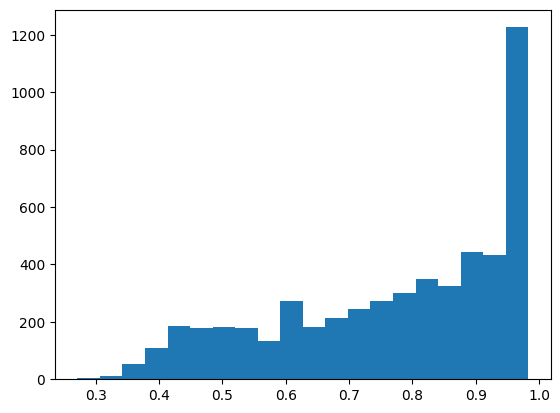

In [31]:
plt.hist(closest_id,20)
plt.show()